# Exploración de datos de COVID19
## Actualizado el: 02/04/2020

import covid.ultima_actualizacion

In [3]:
from datetime import datetime
print(f"""Versión: {datetime.today().strftime('%d/%m/%Y')}""")

Versión: 03/04/2020



#### Este archivo te permitirá explorar los datos del contagio de COVID19 [https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide]

* Este recurso está inspirado en el artículo de Matt Makai, "Learning pandas by Exploring COVID-19 Data", escrito el 28 de marzo de 2020 en Full Stack Python: [https://www.fullstackpython.com/blog/learn-pandas-basic-commands-explore-covid-19-data.html], el cual recomiendo para quienes sepan programar en Python, pero no estén familiarizados con la librería Pandas.

## Paso #1: Cargar los datos
Cargar o "importar" los datos en Python usando un paquete para el manejo de datos llamado "Pandas".

In [47]:
# Activar el paquete Pandas
from pandas import read_csv

## Paso #2: Abrir la tabla de datos
Abriremos la tabla de datos usando el paquete "Pandas" que acabamos de importar
* Usaremos los datos en versión ".csv".
- Si quieren la versión más reciente de los datos:
    1. Los deben bajar directamente de esta página: http://opendata.ecdc.europa.eu/covid19/casedistribution/csv/
    2. Deben de nombrar el archivo como "covid19.csv"
    3. A demás tendrán que bajar este proyecto a su computadora y hacerlo correr.  
        **Si no saben cómo hacer esto, les recomiendo que sigan este link para la versión más reciente de este proyecto, pero siempre me lleva unos días actualizarlo porque este es solo un proyecto por diversión [].**

In [48]:
# Abrimos los datos de todo el mundo y después nos enfocaremos en los datos de México.
folder_datos = 'datos/'
datos_mundo = read_csv(folder_datos + "covid19.csv")

## Paso #3: Familiarizarnos con los datos
*Los datos vienen en una tabla con varias columnas y filas. Cada columna tiene un nombre distinto, por ejemplo hay una para los nombres de los países, otra para la población del país, etc. Y las filas representan un día de la pandemia en cada país.

**3.1. Exploremos los datos del mundo. Primero veamos los nombres de las columnas**

In [49]:
# Este código nos muestra una lista de los datos
for numero_columna, columna in enumerate(list(datos_mundo)): 
    print(f"""Columna # {numero_columna + 1} -> {columna}""")

Columna # 1 -> dateRep
Columna # 2 -> day
Columna # 3 -> month
Columna # 4 -> year
Columna # 5 -> cases
Columna # 6 -> deaths
Columna # 7 -> countriesAndTerritories
Columna # 8 -> geoId
Columna # 9 -> countryterritoryCode
Columna # 10 -> popData2018


Esta es la explicación de los nombres de las columnas:

- Columna # 1 -> fecha completa
- Columna # 2 -> día (del mes en la siguiente columna)
- Columna # 3 -> mes
- Columna # 4 -> año
- Columna # 5 -> número de casos
- Columna # 6 -> númer de muertes
- Columna # 7 -> países y territorios
- Columna # 8 -> número de identificaión del país o territorio
- Columna # 9 -> código del país o territorio
- Columna # 10 -> población en 2018

**3.2. Veamos cómo se ve la tabla, para darnos una mejor idea de los datos**

In [50]:
datos_mundo # Esta línea nos mostrará las primeras y últimas filas de la tabla

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
1,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
2,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
3,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
4,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8097,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8098,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
8099,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8100,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


**3.3. Exploremos el número total de filas que tiene la tabla de datos.**
** Recordemos que esto representa la suma del número de días por cada país representado. Algunas columnas están vacías porque el ECDC no tiene ciertos datos (como por ejemplo la población de México en el 2018 no está en la tabla), así que habrá algunas diferencias.

El siguente código nos mostrará el número de datos de cada columna:

In [51]:
datos_mundo.count() # la operación .count() hace un conteo por columna

dateRep                    8102
day                        8102
month                      8102
year                       8102
cases                      8102
deaths                     8102
countriesAndTerritories    8102
geoId                      8084
countryterritoryCode       8031
popData2018                8084
dtype: int64

**3.4. Ahora veamos cuáles son los países con mayor número de personas infectadas y de muertes**

Primero vamos a tomar los datos de la fecha de esta versión de los datos: 01/04/2020

>**\*Nota que puedes jugar con el día siempre y cuando este esté incluído en la tabla**

In [52]:
# Creamos una nueva tabla pero ahora elegimos solamente los datos del día que nos interesa
datos_esta_version = datos_mundo[datos_mundo.dateRep =='01/04/2020']

**3.4.1. Personas infectadas**

Ahora vamos a ordenar los datos de acuerdo al número de casos de mayor a menor

In [53]:
datos_esta_version.sort_values(by=['cases'], ascending=False)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7833,01/04/2020,1,4,2020,24998,909,United_States_of_America,US,USA,327167434.0
6924,01/04/2020,1,4,2020,9222,849,Spain,ES,ESP,46723749.0
2646,01/04/2020,1,4,2020,7578,499,France,FR,FRA,66987244.0
2877,01/04/2020,1,4,2020,5453,149,Germany,DE,DEU,82927922.0
3928,01/04/2020,1,4,2020,4053,839,Italy,IT,ITA,60431283.0
...,...,...,...,...,...,...,...,...,...,...
5428,01/04/2020,1,4,2020,0,0,Niger,NE,NER,22442948.0
5330,01/04/2020,1,4,2020,0,0,New_Zealand,NZ,NZL,4885500.0
5318,01/04/2020,1,4,2020,0,0,New_Caledonia,NC,NCL,284060.0
5145,01/04/2020,1,4,2020,0,0,Nepal,NP,NPL,28087871.0


**3.4.2. Número de muertes**

Ahora ordenamos los datos de acuerdo al número de muertes de mayor a menor

In [54]:
datos_esta_version.sort_values(by=['deaths'], ascending=False)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
7833,01/04/2020,1,4,2020,24998,909,United_States_of_America,US,USA,327167434.0
6924,01/04/2020,1,4,2020,9222,849,Spain,ES,ESP,46723749.0
3928,01/04/2020,1,4,2020,4053,839,Italy,IT,ITA,60431283.0
2646,01/04/2020,1,4,2020,7578,499,France,FR,FRA,66987244.0
7724,01/04/2020,1,4,2020,3009,381,United_Kingdom,UK,GBR,66488991.0
...,...,...,...,...,...,...,...,...,...,...
3203,01/04/2020,1,4,2020,0,0,Haiti,HT,HTI,11123176.0
3216,01/04/2020,1,4,2020,0,0,Holy_See,VA,VAT,1000.0
3280,01/04/2020,1,4,2020,49,0,Iceland,IS,ISL,353574.0
3826,01/04/2020,1,4,2020,10,0,Isle_of_Man,IM,IMN,84077.0


**\*En la tabla de arriba vemos todos los paises y territorios ordenados por muertes según la fecha seleccionada previamente en 3.4**

## Paso #4: Exploremos los datos de México en relación a otros países

#### 4.1 Seleccionar los países que nos interesa comparar
> \* En 4.2 crearé tablas para México ('Mexico'), Argentina ('Argentina'), Estados Unidos ('United_States_of_America') y Francia ('France'), pero tú puedes cambiar los países. Te dejo la lista completa de países al final de este documento.

#### 4.2 Creemos tablas para cada país que nos interesa
> ¿Por qué vamos a explorar México, Argentina, Estados Unidos y Francia? 
    > La decisión de tomar estos países fue la siguiente:
        > 1.  México, como Estados Unidos, ha tomado medidas de mitigación. ¿Qué significa esto?
            > El caso de mitigación es el siguiente: “Es imposible prevenir el coronavirus. Dejemos que siga su curso mientras intentamos reducir el pico de infecciones. Aplastemos la curva para que sea más manejable para el sistema de salud.” ([Tomas Pueyo, 19 de marzo de 2020](https://medium.com/tomas-pueyo/coronavirus-el-martillo-y-la-danza-32abc4dd4ebb))

> 2. Tanto Argentina como Francia han tomado medidas de supresión:
> El caso de la supresión es el siguiente: "[...] la estrategia de supresión trata de aplicar medidas duras para controlar rápidamente la epidemia. Específicamente:
Aplicar medidas duras ahora mismo. Ordenar un duro distanciamiento social. Poner esta situación bajo control.
Eventualmente, relajar las medidas, de forma que la gente pueda recuperar gradualmente sus libertades y pueda reanudar algo parecido a una vida social y económica normal." ([idem.](https://medium.com/tomas-pueyo/coronavirus-el-martillo-y-la-danza-32abc4dd4ebb))

> 3. El desarrollo de México y Argentina ha sido similar en cuanto al número de casos hasta la fase 3, declarada en México el 01 de abril de 2020. Estimo que las medidas más restringentes de Argentina tendrán un impacto mayor en la reducción del contagio. **No me declaro a favor de ninguna de las dos posturas. Aunque el debate es interesante, aquí vamos a ver de la manera más objetiva que nos permitan los datos limitados que tenemos el desarrollo de la situación, aunque con la información que tenemos es impsible saber por cierto cuál es el efecto de las políticas sanitarias en cada situación ya que hay muchos más factores que tomar en cuenta como el acceso de la población al sistema de salud, el nivel socioeconómico promedio de la población, etc...**:

> 4. El desarrollo de Estados Unidos y de Francia ha sido similar en cuanto al número de casos hasta la fase 3. El día 11 de marzo, Donald Trump impuso [una restricción de viaje](https://travel.state.gov/content/travel/en/traveladvisories/ea/covid-19-information.html) al [aera Schengen de Europa](https://www.google.com/search?q=Schengen&rlz=1C5CHFA_enUS794US794&oq=Schengen&aqs=chrome..69i57.167j0j7&sourceid=chrome&ie=UTF-8) ya que, desde su punto de vista, los países europeos no estaban haciendo lo suficiente para impedir el ingreso del Coronavirus desde China hacia sus países: "The European Union failed to take the same precautions and restrict travel from China and other hot spots.  As a result, a large number of new clusters in the United States were seeded by travelers from Europe." ([Trump, 11 de agisto de 2020](https://www.nytimes.com/2020/03/11/us/politics/trump-coronavirus-speech.html?action=click&module=RelatedLinks&pgtype=Article)). En ese momento, Estados Unidos contaba con X personas infectadas y Francia con Y. Sin embargo, desde mediados de marzo, Francia ha adoptado medidas de supreción, como lo hizo Argentina al rededor de las mismas fechas en contraste con Estados Unidos y México que hasta cerca de abril optaron poco a poco por cambiar su estrategia de mitigación a supresión.

Pueyo, T. (19/03/2020). Coronavirus: The Hammer and the Dance. Tomado de: https://medium.com/@tomaspueyo/coronavirus-the-hammer-and-the-dance-be9337092b56 versión en español traducida por Tito Hubert: https://medium.com/tomas-pueyo/coronavirus-el-martillo-y-la-danza-32abc4dd4ebb

**Crear las tablas de México, Argentina, Estados Unidos y Francia:**

In [215]:
mx = datos_mundo[(datos_mundo['countriesAndTerritories']=='Mexico') & (datos_mundo['month'] >= 1)]
ar = datos_mundo[datos_mundo['countriesAndTerritories']=='Argentina']
us = datos_mundo[datos_mundo['countriesAndTerritories']=='United_States_of_America']
fr = datos_mundo[datos_mundo['countriesAndTerritories']=='France']

#### 4.3. Comparar infecciones y muertes hasta esta versión

**4.3.1. Número infecciones**

In [216]:
print(f"""*Número de infecciones y muertes en México, Argentina, Estados Unidos y Francia
(hasta esta versión):

México        \t= casos: {mx['cases'].sum()}\t muertes: {mx['deaths'].sum()}
Argentina     \t= casos: {ar['cases'].sum()}\t muertes: {ar['deaths'].sum()}
Estados Unidos\t= casos: {us['cases'].sum()}\t muertes: {us['deaths'].sum()}
Francia        \t= casos: {fr['cases'].sum()}\t muertes: {fr['deaths'].sum()}
""")

*Número de infecciones y muertes en México, Argentina, Estados Unidos y Francia
(hasta esta versión):

México        	= casos: 1215	 muertes: 29
Argentina     	= casos: 966	 muertes: 24
Estados Unidos	= casos: 189618	 muertes: 4079
Francia        	= casos: 52128	 muertes: 3523



**4.3.2. Porcentaje de infecciones de acuerdo con la población (2018) de cada país.**
\*Para México utilizamos la estimación del 2019 del Consejo Nacional de Población[https://www.gob.mx/conapo/documentos/la-situacion-demografica-de-mexico-2019] ya que no existen censos actuales y los datos del ECDC no contienen estimados de la población mexicana. El estimado para México es de 126,577,691 habitantes.

In [217]:
mx_habitantes = 126577691

         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
4852  01/04/2020    1      4  2020    121       1                  Mexico   
4853  31/03/2020   31      3  2020    101       8                  Mexico   
4854  30/03/2020   30      3  2020    145       4                  Mexico   
4855  29/03/2020   29      3  2020    131       4                  Mexico   
4856  28/03/2020   28      3  2020    132       4                  Mexico   

     geoId countryterritoryCode  popData2018  
4852    MX                  MEX  126190788.0  
4853    MX                  MEX  126190788.0  
4854    MX                  MEX  126190788.0  
4855    MX                  MEX  126190788.0  
4856    MX                  MEX  126190788.0  


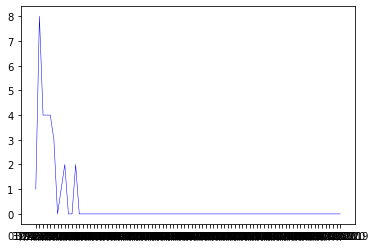

In [218]:
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
mx2 = mx
mx3.sort_values(by=['dateRep'], ascending=True)
print(mx3.head())
plt.plot_date(mx3.dateRep, mx3.deaths, 'b-', linewidth=0.5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
4852,01/04/2020,1,4,2020,121,1,Mexico,MX,MEX,126190788.0
4853,31/03/2020,31,3,2020,101,8,Mexico,MX,MEX,126190788.0
4854,30/03/2020,30,3,2020,145,4,Mexico,MX,MEX,126190788.0
4855,29/03/2020,29,3,2020,131,4,Mexico,MX,MEX,126190788.0
4856,28/03/2020,28,3,2020,132,4,Mexico,MX,MEX,126190788.0


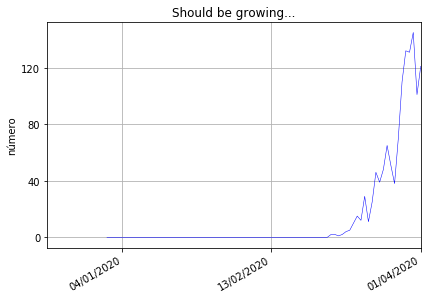

In [228]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

def plot_ts(df, field):
    dates = df["dateRep"]
    values = df[field]
    vals = list()
    dts = list()
    for i, j in enumerate(dates):
        dts.append(dates.iloc[i])
        vals.append(values.iloc[i])
    a = plt.plot_date(dts, vals, 'b-', linewidth=0.5)#, dts
    return a

fig, ax = plt.subplots()
ax.set_xlim(100, 0)  # decreasing time
fig.autofmt_xdate()
ax.set_ylabel('número')
ax.set_title('Should be growing...')
plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.grid(True)
ax = plot_ts(mx3, 'cases')
mx3.head()


#### 4.4. Comparar trayectorias de infecciones y muertes hasta esta versión
La comparación se hace por medio de pruebas de estudiante (student t-tests). Aunque podríamos hacer análisis estadísticos más complejos, para esta exploración nos bastará hacer pruebas simples comparando a México con cada país.

In [60]:
from scipy.stats import ttest_ind

# México en comparación a Argentina
mx_ar_casos = ttest_ind(mx['cases'], ar['cases'])
mx_ar_muertes = ttest_ind(mx['deaths'], ar['deaths'])

# Estados Unidos en comparación a Francia
us_fr_casos = ttest_ind(us['cases'], fr['cases'])
us_fr_muertes = ttest_ind(us['deaths'], fr['deaths'])

# México en comparación a Estados Unidos
mx_us_casos = ttest_ind(mx['cases'], us['cases'])
mx_us_muertes = ttest_ind(mx['deaths'], us['deaths'])

# México en comparación a Francia
mx_fr_casos = ttest_ind(mx['cases'], fr['cases'])
mx_fr_muertes = ttest_ind(mx['deaths'], fr['deaths'])

print('\nMéxico en comparación a Argentina')
print(f"""Casos
statistic = {mx_ar_casos.statistic} significance = {mx_ar_casos.pvalue}""")
print(f"""Muertes
statistic = {mx_ar_muertes.statistic} significance = {mx_ar_muertes.pvalue}""")
print('\nEstados Unidos en comparación a Francia')
print(f"""Casos
statistic = {us_fr_casos.statistic} significance = {us_fr_casos.pvalue}""")
print(f"""Muertes
statistic = {us_fr_muertes.statistic} significance = {us_fr_muertes.pvalue}""")
print('\nMéxico en comparación a Estados Unidos')
print(f"""Casos
statistic = {mx_us_casos.statistic} significance = {mx_us_casos.pvalue}""")
print(f"""Muertes
statistic = {mx_us_muertes.statistic} significance = {mx_us_muertes.pvalue}""")
print('\nMéxico en comparación a Francia')
print(f"""Casos
statistic = {mx_fr_casos.statistic} significance = {mx_fr_casos.pvalue}""")
print(f"""Muertes
statistic = {mx_fr_muertes.statistic} significance = {mx_fr_muertes.pvalue}""")


México en comparación a Argentina
Casos
statistic = -2.854082618989662 significance = 0.005167010480135505
Muertes
statistic = -2.061264632415571 significance = 0.04165717848822237

Estados Unidos en comparación a Francia
Casos
statistic = 2.5775816937243987 significance = 0.010732205508128066
Muertes
statistic = 0.3359349393091761 significance = 0.7373026874274474

México en comparación a Estados Unidos
Casos
statistic = -3.470305591442722 significance = 0.0006538656054418526
Muertes
statistic = -2.860905966822683 significance = 0.004736070351760703

México en comparación a Francia
Casos
statistic = -3.885575349050013 significance = 0.00014437906413336724
Muertes
statistic = -3.495602151967017 significance = 0.0005985770831222802


## Lista de países y territorios en los datos de esta versión
El código a continuación extrae los países y territorios representados en esta versión de los datos.
Espero que esto te ayude a explorar más adelante sustituyendo el nombre de los países que yo seleccioné por el nombre de los países que tú quieras explorar:

In [61]:
# usamos .unique para tomar una instancia de cada país
lista_paises = [pais for pais in datos_mundo['countriesAndTerritories'].unique()]

# imprimiremos los países y territorios de siete en siete para ahorrar espacio,
n_paises = len(lista_paises)
paises_por_compensar = n_paises % 7

# Compensamos con ""
for num in range(paises_por_compensar):
    lista_paises.append("") 

# imprimir filas de siete países
imprimir = []
contador = 0
for pais in lista_paises:
    imprimir.append(pais)
    contador +=1
    if contador == 7:
        contador = 0
        print("{} - {} - {} - {} - {} - {} - {}".format(*imprimir))
        imprimir = []

Afghanistan - Angola - Albania - Andorra - Algeria - Anguilla - Antigua_and_Barbuda
Argentina - Armenia - Aruba - Australia - Austria - Azerbaijan - Bahamas
Bahrain - Bangladesh - Barbados - Belarus - Belgium - Belize - Benin
Bermuda - Bhutan - Bolivia - Bosnia_and_Herzegovina - Botswana - Brazil - British_Virgin_Islands
Brunei_Darussalam - Bulgaria - Burkina_Faso - Burundi - Cambodia - Cameroon - Canada
Cape_Verde - Cases_on_an_international_conveyance_Japan - Cayman_Islands - Central_African_Republic - Chad - Chile - China
Colombia - Congo - Costa_Rica - Cote_dIvoire - Croatia - Cuba - Curaçao
Cyprus - Czech_Republic - Democratic_Republic_of_the_Congo - Denmark - Djibouti - Dominica - Dominican_Republic
Ecuador - Egypt - El_Salvador - Equatorial_Guinea - Eritrea - Estonia - Eswatini
Ethiopia - Falkland_Islands_(Malvinas) - Faroe_Islands - Fiji - Finland - France - French_Polynesia
Gabon - Gambia - Georgia - Germany - Ghana - Gibraltar - Greece
Greenland - Grenada - Guam - Guatemala -